## Import Library

In [10]:
!pip install gdown

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import pickle
import math
import joblib
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from scipy import optimize
from sklearn.svm import SVC

## Import Pre-processed Data

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
!mkdir -p content/data
# Download all files
file_ids = [
    '1fdbbwFuXm0zrXYi3i9MvCqilA9i7OcZq',  # X_train
    '1-1iUTztO9XpxwzF02JhoW3pdMs5jKrw1',  # X_train_resampled
    '1-39uqbcZldsGLgDKYfxIHsSNGewMXJRR',  # X_test
    '1Ms25aS5NADPDYdt8AGAUyYIjbdBvKGFZ',  # X_test_resampled
    '1-CChPe58Z6E-H6EXIzKsgUhqbITAd54z',  # Y_train
    '1D3wYlWZbt5NeM59QTA1JaVVvnaAZzFUf',  # Y_train_resampled
    '1-CUpVhcZ6-Qop7R9Z6Btb2gEf7f0XgGy'   # Y_test
]

file_paths = [
    'content/data/X_train.pkl',
    'content/data/X_train_resampled.pkl',
    'content/data/X_test.pkl',
    'content/data/X_test_resampled.pkl',
    'content/data/Y_train.pkl',
    'content/data/Y_train_resampled.pkl',
    'content/data/Y_test.pkl'
]
for file_id, file_path in zip(file_ids, file_paths):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1fdbbwFuXm0zrXYi3i9MvCqilA9i7OcZq
To: /content/content/data/X_train.pkl
100%|██████████| 21.4M/21.4M [00:00<00:00, 43.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1iUTztO9XpxwzF02JhoW3pdMs5jKrw1
To: /content/content/data/X_train_resampled.pkl
100%|██████████| 18.7M/18.7M [00:00<00:00, 35.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-39uqbcZldsGLgDKYfxIHsSNGewMXJRR
To: /content/content/data/X_test.pkl
100%|██████████| 5.35M/5.35M [00:00<00:00, 202MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ms25aS5NADPDYdt8AGAUyYIjbdBvKGFZ
To: /content/content/data/X_test_resampled.pkl
100%|██████████| 5.35M/5.35M [00:00<00:00, 16.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-CChPe58Z6E-H6EXIzKsgUhqbITAd54z
To: /content/content/data/Y_train.pkl
100%|██████████| 2.79M/2.79M [00:00<00:00, 136MB/s]
Downloading...
From: https://drive.google.com/uc?id=1D3wYlWZbt5NeM59QTA1JaVVvnaAZzFUf
To: /content/

In [14]:
X_train = pd.read_pickle('content/data/X_train.pkl')
X_train_resampled = pd.read_pickle('content/data/X_train_resampled.pkl')
X_test = pd.read_pickle('content/data/X_test.pkl')
X_test_resampled = pd.read_pickle('content/data/X_test_resampled.pkl')
y_train = pd.read_pickle('content/data/Y_train.pkl')
y_train_resampled = pd.read_pickle('content/data/Y_train_resampled.pkl')
y_test = pd.read_pickle('content/data/Y_test.pkl')

## 1. SVM - Thư viện

In [15]:
result_acc = []
result_recall = []
pred_time = []
accuracies = {}

In [16]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()
X_train_resampled=X_train_resampled.to_numpy()
y_train_resampled=y_train_resampled.to_numpy()
X_test_resampled=X_test_resampled.to_numpy()

batch_size = 2000
def batch_generator(X, y, batch_size):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=None, train_size=batch_size, random_state=42)
    size = len(X)

    # Sử dụng StratifiedShuffleSplit để chia dữ liệu thành các batch có phân phối nhãn giống nhau
    for train_index, _ in sss.split(X, y):
        # Xử lý từng batch
        X_batch = X[train_index]
        y_batch = y[train_index]

        # Trả về numpy arrays của batch
        yield np.array(X_batch), np.array(y_batch)

### 1.1 No resampled

In [17]:
X_train_40, _, y_train_40, _ = train_test_split(X_train, y_train, test_size=0.6, random_state=42, stratify=y_train)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
start_time = time.time()
y_pred = svm.predict(X_test)
end_time = time.time()
predict_time = end_time-start_time
acc = accuracy_score(y_test, y_pred)*100
print("Test Accuracy {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")

Test Accuracy 85.56%
Time to predict: 37.2567 seconds


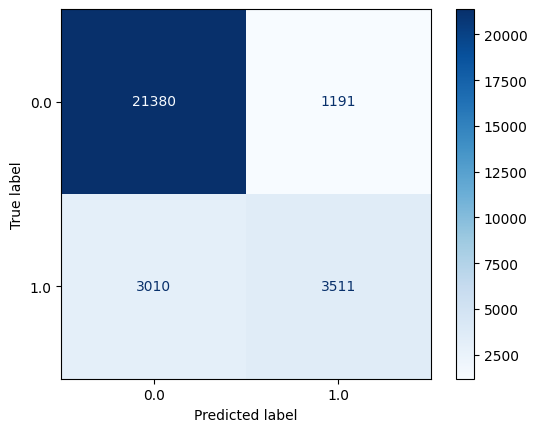

<Figure size 1200x1200 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, cmap='Blues')
plt.figure(figsize=(12, 12))
plt.show();

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     22571
         1.0       0.75      0.54      0.63      6521

    accuracy                           0.86     29092
   macro avg       0.81      0.74      0.77     29092
weighted avg       0.85      0.86      0.85     29092



In [ ]:
# Khởi tạo mô hình SVM cơ bản
svm_model = SVC()

# Định nghĩa các tham số mà GridSearch sẽ tìm kiếm
param_grid_svm = {
    'C': [0.1, 1, 10],                  # C sẽ tìm kiếm trong các giá trị này
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']   # Kernel sẽ thử nghiệm với các loại kernel khác nhau
}

# Khởi tạo GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

# Thực hiện GridSearch trên tập huấn luyện
grid_search_svm.fit(X_train_40, y_train_40)

# In ra tham số tốt nhất mà GridSearch tìm được
print("Best parameters found by GridSearchCV for SVM:", grid_search_svm.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found by GridSearchCV for SVM: {'C': 10, 'kernel': 'rbf'}


In [ ]:
cv_results = grid_search_svm.cv_results_
kernels = param_grid_svm['kernel']
kernel_times = {kernel: 0 for kernel in kernels}

for kernel in kernels:
    kernel_mask = [param['kernel'] == kernel for param in cv_results['params']]
    kernel_times[kernel] = sum(cv_results['mean_fit_time'][kernel_mask])

# In thời gian huấn luyện cho từng kernel
for kernel, time_spent in kernel_times.items():
    print(f"Thời gian huấn luyện cho kernel '{kernel}': {time_spent:.2f} giây")

Thời gian huấn luyện cho kernel 'linear': 576.77 giây
Thời gian huấn luyện cho kernel 'poly': 250.89 giây
Thời gian huấn luyện cho kernel 'rbf': 189.36 giây
Thời gian huấn luyện cho kernel 'sigmoid': 146.43 giây


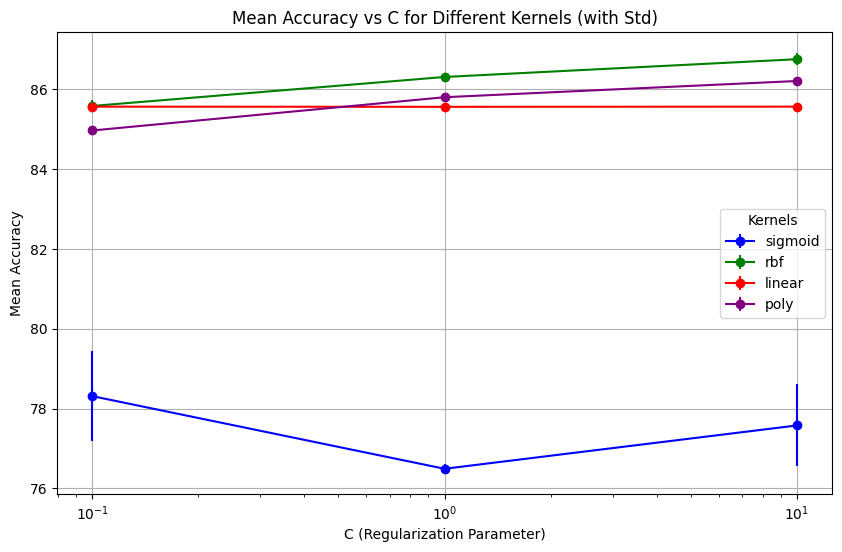

In [ ]:
mean_acc = cv_results['mean_test_score']*100
std_acc = cv_results['std_test_score']*100
param_C = [param['C'] for param in cv_results['params']]
param_kernel = [param['kernel'] for param in cv_results['params']]

# Chuẩn bị dữ liệu cho biểu đồ
unique_kernels = list(set(param_kernel))
kernel_colors = ['blue', 'green', 'red', 'purple']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
for idx, kernel in enumerate(unique_kernels):
    kernel_mask = np.array(param_kernel) == kernel
    plt.errorbar(np.array(param_C)[kernel_mask], mean_acc[kernel_mask], yerr=std_acc[kernel_mask],
                 label=f"{kernel}", fmt='o-', color=kernel_colors[idx])

# Cấu hình biểu đồ
plt.xscale('log')
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy vs C for Different Kernels (with Std)")
plt.legend(title="Kernels", fontsize=10, loc='best')
plt.grid(True)
plt.show()

In [ ]:
# Tìm tham số tốt nhất cho Rbf Kernel SVM
rbf_model = SVC(kernel='rbf')
n_features = X_train_40.shape[1]
variance = np.var(X_train_40, axis=0).mean()
gamma_scale = 1 / (n_features * variance)
gamma_auto = 1 / n_features
print(f"Gamma (scale): {gamma_scale}")
print(f"Gamma (auto): {gamma_auto}")

# Định nghĩa các tham số cho GridSearch
param_grid_rbf = {
    'C': [1, 5, 10, 20],
    'gamma': [0.01,gamma_auto,gamma_scale,1]
}

grid_search_rbf = GridSearchCV(rbf_model, param_grid_rbf, cv=3, verbose=1, n_jobs=-1, scoring='accuracy',return_train_score=True)

grid_search_rbf.fit(X_train_40, y_train_40)

# Lấy kết quả từ GridSearch
cv_results = pd.DataFrame(grid_search_rbf.cv_results_)
print("Best parameters found by GridSearchCV for SVM:", grid_search_rbf.best_params_)

Gamma (scale): 0.04541241031712871
Gamma (auto): 0.043478260869565216
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found by GridSearchCV for SVM: {'C': 5, 'gamma': 0.04541241031712871}


In [ ]:
gamma_values = [0.01, gamma_auto, gamma_scale,1]
plt.figure(figsize=(10,8))
# Lặp qua từng giá trị gamma để tạo biểu đồ
for idx, gamma in enumerate(gamma_values):
    plt.subplot(2,2,idx + 1)  # Tạo subplot
    gamma_subset = cv_results[cv_results['param_gamma'] == gamma]
# Vẽ đường biểu diễn
    plt.plot(
        gamma_subset['param_C'],
        gamma_subset['mean_test_score']*100,
        marker='o',
        label='Test Accuracy'
    )
    plt.plot(
        gamma_subset['param_C'],
        gamma_subset['mean_train_score']*100,
        marker='x',
        label='Train Accuracy'
    )
    plt.xlabel('C')
    plt.ylabel('Mean Accuracy(%)')
    plt.ylim([60, 105])
    plt.xscale('1')
    plt.xticks(param_grid_rbf, labels=[str(c) for c in param_grid_rbf['C']])
    plt.title(f"Gamma = {gamma: .3f}", fontsize=14)
    plt.legend(loc='upper left')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
svm_tune = SVC(kernel='rbf',C=10,gamma=gamma_scale)
for X_batch, y_batch in batch_generator(X_train, y_train, batch_size=35000):
        svm_tune.fit(X_batch, y_batch)
start_time = time.time()
y_tune_pred = svm_tune.predict(X_test)
end_time = time.time()
predict_time = end_time-start_time
pred_time.append(predict_time)
acc = accuracy_score(y_test, y_tune_pred)*100
result_acc.append(acc)
print("Test Accuracy {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")

Test Accuracy 86.58%
Time to predict: 25.7936 seconds


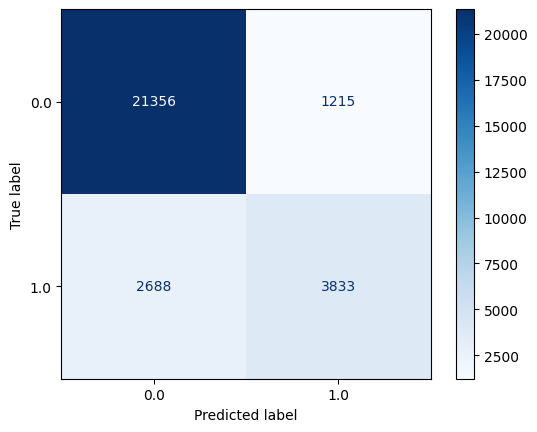

<Figure size 1200x1200 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm_tune, X_test, y_test, cmap='Blues')
plt.figure(figsize=(12, 12))
plt.show();

In [ ]:
print(classification_report(y_test, y_tune_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     22571
         1.0       0.76      0.59      0.66      6521

    accuracy                           0.87     29092
   macro avg       0.82      0.77      0.79     29092
weighted avg       0.86      0.87      0.86     29092



In [ ]:
recall_s = recall_score(y_test, svm_tune.predict(X_test), average=None)
result_recall.append(recall_s)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là ', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là là', recall_s[0])

Tỉ lệ dự đoán đúng ngày mai có mưa là  0.587793283238767
Tỉ lệ dự đoán đúng ngày mai không có mưa là là 0.9461698639847592


### 1.2 Resampled

In [ ]:
# Khởi tạo mô hình SVM cơ bản
svm_model = SVC()

# Định nghĩa các tham số mà GridSearch sẽ tìm kiếm
param_grid_svm = {
    'C': [0.001, 0.1, 1, 2, 5, 50],                  # C sẽ tìm kiếm trong các giá trị này
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']   # Kernel sẽ thử nghiệm với các loại kernel khác nhau
}

# Khởi tạo GridSearchCV
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')

# Thực hiện GridSearch trên tập huấn luyện
grid_search_svm.fit(X_train_40, y_train_40)

# In ra tham số tốt nhất mà GridSearch tìm được
print("Best parameters found by GridSearchCV for SVM:", grid_search_svm.best_params_)

# Lấy mô hình tốt nhất từ GridSearch
best_svm_model = grid_search_svm.best_estimator_


# Đánh giá mô hình tốt nhất trên tập kiểm tra
acc_svm = best_svm_model.score(X_test_resampled, y_test) * 100
print(f"Best Test Accuracy for SVM: {acc_svm:.2f}%")

# Dự đoán trên tập test
y_pred_svm = best_svm_model.predict(X_test_resampled)

# Tính recall cho mỗi lớp
recall_svm = recall_score(y_test, y_pred_svm, average=None)
print(f"Recall for class 0: {recall_svm[0] * 100:.2f}%")
print(f"Recall for class 1: {recall_svm[1] * 100:.2f}%")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters found by GridSearchCV for SVM: {'C': 5, 'kernel': 'rbf'}
Best Test Accuracy for SVM: 84.17%
Recall for class 0: 86.69%
Recall for class 1: 75.45%


In [ ]:
# Tạo đối tượng SVM với kernel rbf
svm_resampled = SVC(C=5,kernel='rbf')
for X_batch, y_batch in batch_generator(X_train_resampled, y_train_resampled, batch_size=35000):
        svm_resampled.fit(X_batch, y_batch)
start_time = time.time()
y_pred = svm_resampled.predict(X_test_resampled)
end_time = time.time()
predict_time = end_time-start_time
pred_time.append(predict_time)
acc = accuracy_score(y_test, y_pred)*100
result_acc.append(acc)
print("Test Accuracy {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")

Test Accuracy 85.11%
Time to predict: 32.3289 seconds


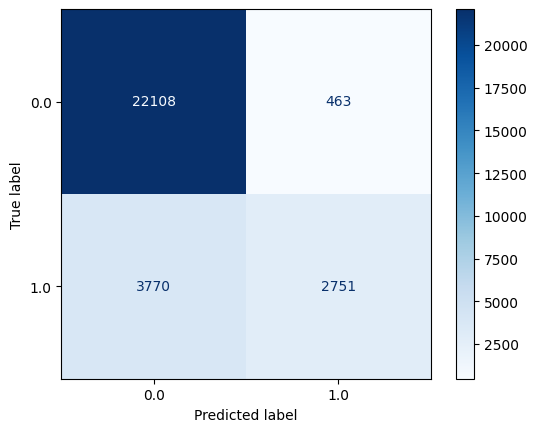

<Figure size 1200x1200 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_estimator(svm, X_test_resampled, y_test, cmap='Blues')
plt.figure(figsize=(12, 12))
plt.show();

In [ ]:
y_pred = svm_resampled.predict(X_test_resampled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     22571
         1.0       0.66      0.77      0.71      6521

    accuracy                           0.86     29092
   macro avg       0.80      0.83      0.81     29092
weighted avg       0.87      0.86      0.86     29092



In [ ]:
recall_s = recall_score(y_test, y_pred, average=None)
result_recall.append(recall_s)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là ', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là là', recall_s[0])

Tỉ lệ dự đoán đúng ngày mai có mưa là  0.6506670756019015
Tỉ lệ dự đoán đúng ngày mai không có mưa là là 0.9057197288556111


## 2. SVM - Tự code

In [ ]:
class SVM:
  def __init__(self, kernel='linear', C=1, max_iter=500, degree=2, gamma=0.25,random_seed=10):
    self.kernel = {'rbf'   : lambda x,y: np.exp(-gamma*np.sum((y - x[:,np.newaxis])**2, axis=-1)),
                   'linear': lambda x,y: np.dot(x, y.T)}[kernel]
    self.C = C
    self.max_iter = max_iter
    self.random_seed = random_seed  # Lưu giá trị random seed
    np.random.seed(self.random_seed)
  # limit aj
  def restrict_to_square(self, t, v0, u):
    t = (np.clip(v0 + t*u, 0, self.C) - v0)[1]/u[1]
    return (np.clip(v0 + t*u, 0, self.C) - v0)[0]/u[0]

  def fit(self, X, y):

    self.X = X.copy()
     # Convert y to {-1, 1}
    self.y = y * 2 - 1
    self.lambdas = np.zeros_like(self.y, dtype=float)
    self.K = self.kernel(self.X, self.X) * self.y[:,np.newaxis] * self.y

    for _ in range(self.max_iter):
      for idxM in range(len(self.lambdas)):
        idxL = np.random.randint(0, len(self.lambdas))
        Q = self.K[[[idxM, idxM], [idxL, idxL]], [[idxM, idxL], [idxM, idxL]]]
        v0 = self.lambdas[[idxM, idxL]]
        k0 = 1 - np.sum(self.lambdas * self.K[[idxM, idxL]], axis=1)
        u = np.array([-self.y[idxL], self.y[idxM]])
        t_max = np.dot(k0, u) / (np.dot(np.dot(Q, u), u) + 1E-15)
        self.lambdas[[idxM, idxL]] = v0 + u * self.restrict_to_square(t_max, v0, u)

    idx, = np.nonzero(self.lambdas > 1E-15)
    self.b = np.mean((1.0 - np.sum(self.K[idx] * self.lambdas, axis=1)) * self.y[idx])

  def decision_function(self, X):
    return np.sum(self.kernel(X, self.X) * self.y * self.lambdas, axis=1) + self.b

  def predict(self, X):
    return (np.sign(self.decision_function(X)) + 1) // 2

  def score(self, X, y):
    y_pred = self.predict(X)
    return accuracy_score(y, y_pred)  # So sánh nhãn dự đoán với nhãn thực tế

  # Hàm hỗ trợ ConfusionMatrixDisplay từ scikit-learn
  def confusion_matrix(self, X, y):
    y_pred = self.predict(X)
    return confusion_matrix(y, y_pred)

  # Hàm hiển thị ConfusionMatrix bằng ConfusionMatrixDisplay
  def plot_confusion_matrix(self, X, y):
    cm = self.confusion_matrix(X, y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.figure(figsize=(12, 12))
    plt.show();

### No resampled


In [ ]:
accs = []
recalls_0 = []
recalls_1 = []
arr_K = ['rbf','linear']

for k_test in arr_K:
    model = SVM(kernel=k_test, C=1)

    for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
        model.fit(X_batch, y_batch)

    acc = model.score(X_test, y_test) * 100
    accs.append(acc)
    y_pred = model.predict(X_test)
    recall_s = recall_score(y_test, y_pred, average=None)
    recalls_0.append(recall_s[0]*100)  # Recall cho nhãn 0
    recalls_1.append(recall_s[1]*100)  # Recall cho nhãn 1

    print(f"Test Accuracy with {k_test} kernel: {acc:.2f}%")

Test Accuracy with rbf kernel: 82.29%
Test Accuracy with linear kernel: 84.85%


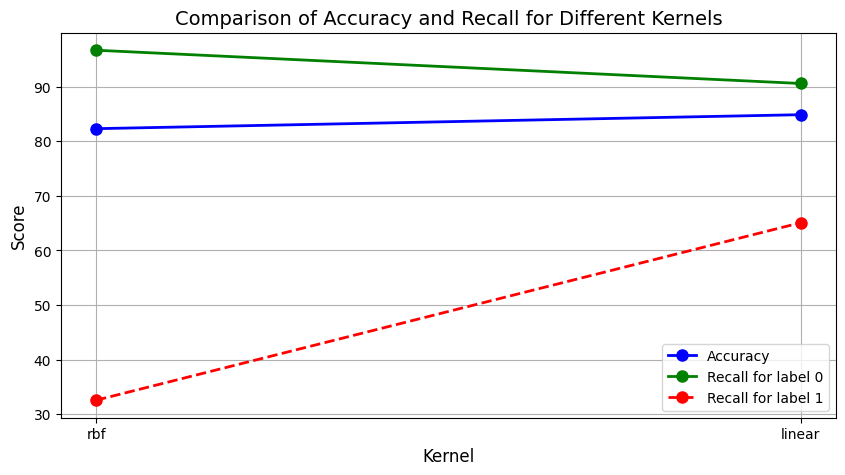

In [ ]:
# Vẽ biểu đồ so sánh accuracy và recall cho 2 nhãn 0,1
plt.figure(figsize=(10, 5))
plt.plot(arr_K, accs, label='Accuracy', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.plot(arr_K, recalls_0, label='Recall for label 0', marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.plot(arr_K, recalls_1, label='Recall for label 1', marker='o', color='r', linestyle='--', linewidth=2, markersize=8)

plt.title('Comparison of Accuracy and Recall for Different Kernels', fontsize=14)
plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

In [ ]:
arr_C = [0.001, 0.1, 1, 2, 5, 10, 50]
kernel = 'linear'

accs = []
recalls_0 = []
recalls_1 = []

# Huấn luyện mô hình và tính toán các chỉ số cho từng giá trị C
for C_test in arr_C:
    model = SVM(kernel=kernel, C=C_test)

    for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
        model.fit(X_batch, y_batch)

    acc = model.score(X_test, y_test) * 100
    accs.append(acc)
    y_pred = model.predict(X_test)
    recall_s = recall_score(y_test, y_pred, average=None)
    recalls_0.append(recall_s[0]*100)  # Recall cho nhãn 0
    recalls_1.append(recall_s[1]*100)  # Recall cho nhãn 1

    print(f"Test Accuracy with C = {C_test}: {acc:.2f}%")

Test Accuracy with C = 0.001: 84.35%
Test Accuracy with C = 0.1: 84.73%
Test Accuracy with C = 1: 84.85%
Test Accuracy with C = 2: 84.79%
Test Accuracy with C = 5: 84.48%
Test Accuracy with C = 10: 84.35%
Test Accuracy with C = 50: 80.65%


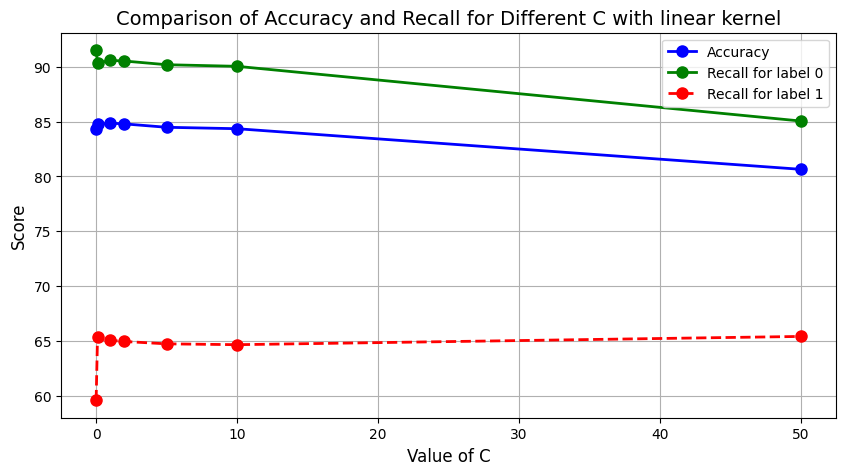

In [ ]:
# Vẽ biểu đồ so sánh accuracy và recall cho 2 nhãn 0,1
plt.figure(figsize=(10, 5))
plt.plot(arr_C, accs, label='Accuracy', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.plot(arr_C, recalls_0, label='Recall for label 0', marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.plot(arr_C, recalls_1, label='Recall for label 1', marker='o', color='r', linestyle='--', linewidth=2, markersize=8)

plt.title('Comparison of Accuracy and Recall for Different C with linear kernel', fontsize=14)
plt.xlabel('Value of C', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

In [ ]:
print("- Training ...")
model = SVM(kernel='linear', C=1)
for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
    model.fit(X_batch, y_batch)
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()
predict_time = end_time-start_time
pred_time.append(predict_time)
acc = accuracy_score(y_test, y_pred)*100
result_acc[2] = acc

# Lưu kết quả vào dictionary accuracies
accuracies['Self- developed SVM'] = acc

# In kết quả độ chính xác
print("Test Accuracy: {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")

- Training ...
Test Accuracy: 84.85%
Time to predict: 0.6670 seconds


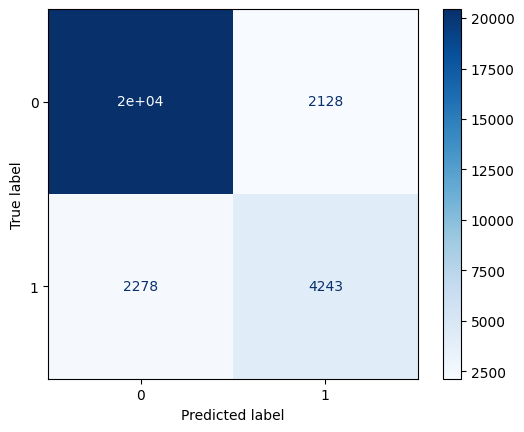

<Figure size 1200x1200 with 0 Axes>

In [ ]:
model.plot_confusion_matrix(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     22571
         1.0       0.67      0.65      0.66      6521

    accuracy                           0.85     29092
   macro avg       0.78      0.78      0.78     29092
weighted avg       0.85      0.85      0.85     29092



In [ ]:
recall_s = recall_score(y_test, y_pred, average=None)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là ', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là là', recall_s[0])

Tỉ lệ dự đoán đúng ngày mai có mưa là  0.6506670756019015
Tỉ lệ dự đoán đúng ngày mai không có mưa là là 0.9057197288556111


### Resampled

In [ ]:
accs = []
recalls_0 = []
recalls_1 = []
arr_K = ['rbf','linear']

for k_test in arr_K:
    model = SVM(kernel=k_test, C=1)

    for X_batch, y_batch in batch_generator(X_train_resampled, y_train_resampled, batch_size):
        model.fit(X_batch, y_batch)

    acc = model.score(X_test_resampled, y_test) * 100
    accs.append(acc)
    y_pred = model.predict(X_test_resampled)
    recall_s = recall_score(y_test, y_pred, average=None)
    recalls_0.append(recall_s[0]*100)  # Recall cho nhãn 0
    recalls_1.append(recall_s[1]*100)  # Recall cho nhãn 1

    print(f"Test Accuracy with {k_test} kernel: {acc:.2f}%")

Test Accuracy with rbf kernel: 81.19%
Test Accuracy with linear kernel: 82.43%


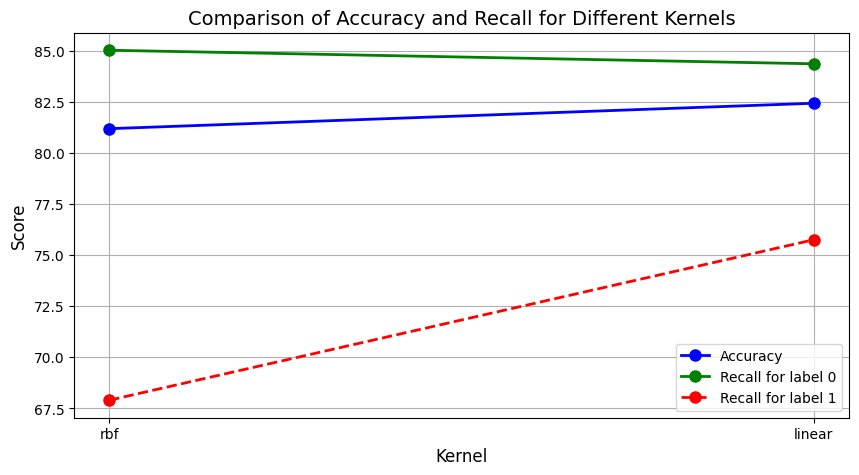

In [ ]:
# Vẽ biểu đồ so sánh accuracy và recall cho 2 nhãn 0,1
plt.figure(figsize=(10, 5))
plt.plot(arr_K, accs, label='Accuracy', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.plot(arr_K, recalls_0, label='Recall for label 0', marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.plot(arr_K, recalls_1, label='Recall for label 1', marker='o', color='r', linestyle='--', linewidth=2, markersize=8)

plt.title('Comparison of Accuracy and Recall for Different Kernels', fontsize=14)
plt.xlabel('Kernel', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

In [ ]:
arr_C = [0.001, 0.1, 1, 2, 5,10, 50]
kernel = 'linear'

accs = []
recalls_0 = []
recalls_1 = []

# Huấn luyện mô hình và tính toán các chỉ số cho từng giá trị C
for C_test in arr_C:
    model = SVM(kernel=kernel, C=C_test)

    for X_batch, y_batch in batch_generator(X_train_resampled, y_train_resampled, batch_size):
        model.fit(X_batch, y_batch)

    acc = model.score(X_test_resampled, y_test) * 100
    accs.append(acc)
    y_pred = model.predict(X_test_resampled)
    recall_s = recall_score(y_test, y_pred, average=None)
    recalls_0.append(recall_s[0]*100)  # Recall cho nhãn 0
    recalls_1.append(recall_s[1]*100)  # Recall cho nhãn 1

    print(f"Test Accuracy with C = {C_test}: {acc:.2f}%")

Test Accuracy with C = 0.001: 80.38%
Test Accuracy with C = 0.1: 82.27%
Test Accuracy with C = 1: 82.43%
Test Accuracy with C = 2: 82.31%
Test Accuracy with C = 5: 82.31%
Test Accuracy with C = 10: 82.23%
Test Accuracy with C = 50: 68.97%


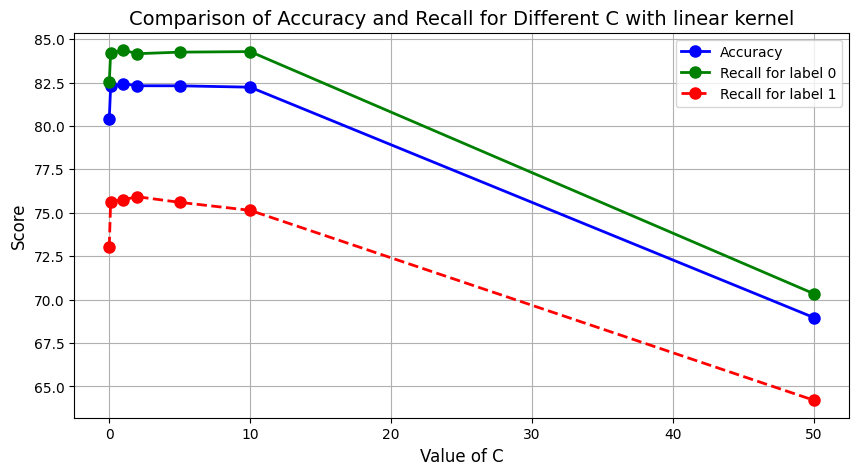

In [ ]:
# Vẽ biểu đồ so sánh accuracy và recall cho 2 nhãn 0,1
plt.figure(figsize=(10, 5))
plt.plot(arr_C, accs, label='Accuracy', marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.plot(arr_C, recalls_0, label='Recall for label 0', marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.plot(arr_C, recalls_1, label='Recall for label 1', marker='o', color='r', linestyle='--', linewidth=2, markersize=8)

plt.title('Comparison of Accuracy and Recall for Different C with linear kernel', fontsize=14)
plt.xlabel('Value of C', fontsize=12)
plt.ylabel('Score', fontsize=12)

plt.legend()

plt.grid(True)
plt.show()

In [ ]:
print("- Training ...")
model = SVM(kernel='linear', C=1)
for X_batch, y_batch in batch_generator(X_train_resampled, y_train_resampled, batch_size):
    model.fit(X_batch, y_batch)
start_time = time.time()
y_pred = model.predict(X_test_resampled)
end_time = time.time()
predict_time = end_time-start_time
pred_time.append(predict_time)
acc = accuracy_score(y_test, y_pred)*100
result_acc[3]=acc
print("Test Accuracy: {:.2f}%".format(acc))
print(f"Time to predict: {predict_time:.4f} seconds")

- Training ...
Test Accuracy: 82.43%
Time to predict: 0.6561 seconds


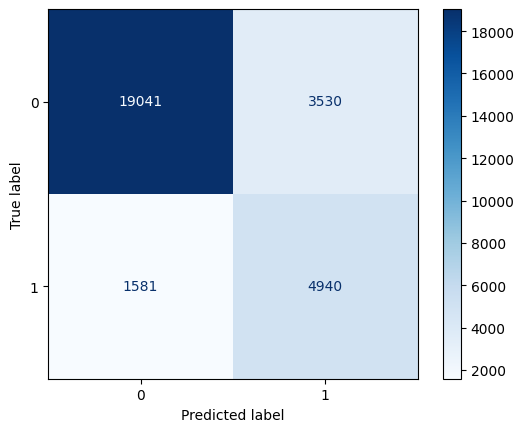

<Figure size 1200x1200 with 0 Axes>

In [ ]:
model.plot_confusion_matrix(X_test_resampled, y_test)

In [ ]:
y_pred = model.predict(X_test_resampled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88     22571
         1.0       0.58      0.76      0.66      6521

    accuracy                           0.82     29092
   macro avg       0.75      0.80      0.77     29092
weighted avg       0.85      0.82      0.83     29092



In [ ]:
recall_s = recall_score(y_test, y_pred, average=None)
print('Tỉ lệ dự đoán đúng ngày mai có mưa là ', recall_s[1])
print('Tỉ lệ dự đoán đúng ngày mai không có mưa là là', recall_s[0])

Tỉ lệ dự đoán đúng ngày mai có mưa là  0.7575525226192302
Tỉ lệ dự đoán đúng ngày mai không có mưa là là 0.8436046254042798


## 3. Model Comparing

In [ ]:
result_acc

[86.58394060222741, 85.11274577203355, 84.85494293963977, 82.43159631513818]

In [ ]:
result_recall

[array([0.94616986, 0.58779328]), array([0.90571973, 0.65066708])]

In [ ]:
pred_time

[25.79363489151001, 32.32885718345642, 0.748502254486084, 0.7848889827728271]

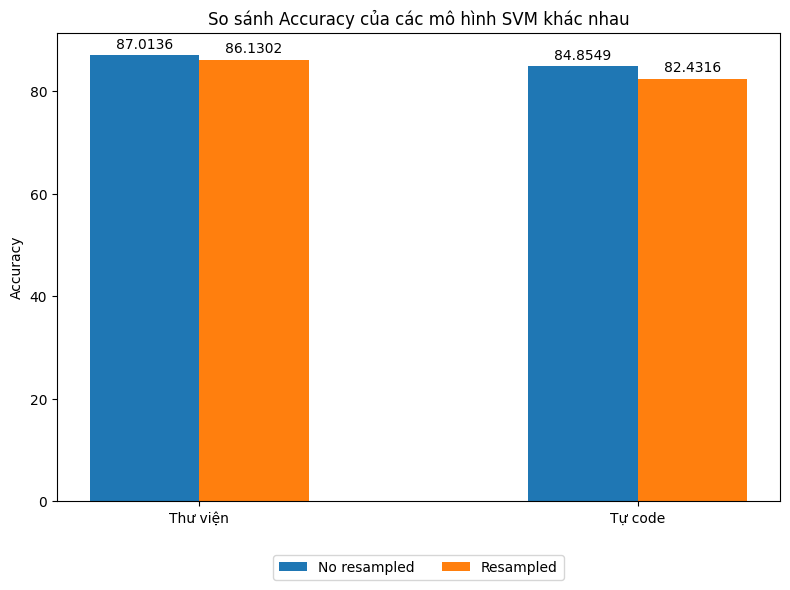

In [ ]:
labels = ['Thư viện', 'Tự code']
no_res = [result_acc[0], result_acc[2]]
res = [result_acc[1], result_acc[3]]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, no_res, width, label='No resampled')
rects2 = ax.bar(x + width/2, res, width, label='Resampled')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('So sánh Accuracy của các mô hình SVM khác nhau')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

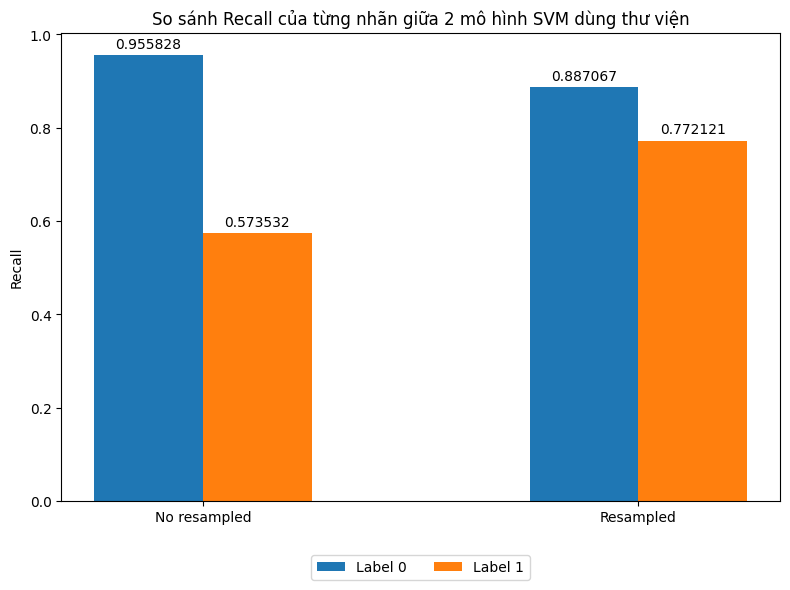

In [ ]:
labels = ['No resampled', 'Resampled']
label_0 = [result_recall[0][0], result_recall[1][0]]
label_1 = [result_recall[0][1], result_recall[1][1]]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, label_0, width, label='Label 0')
rects2 = ax.bar(x + width/2, label_1, width, label='Label 1')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Recall')
ax.set_title('So sánh Recall của từng nhãn giữa 2 mô hình SVM dùng thư viện')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
labels = ['Thư viện', 'Tự code']
no_res = [pred_time[0], pred_time[2]]
res = [pred_time[1], pred_time[3]]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, no_res, width, label='No resampled')
rects2 = ax.bar(x + width/2, res, width, label='Resampled')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Thời gian(s)')
ax.set_title('So sánh thời gian phán đoán trên tập test của các mô hình SVM khác nhau')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

ax.bar_label(rects1, padding=3, labels=[f"{value:.4f}" for value in no_res])
ax.bar_label(rects2, padding=3, labels=[f"{value:.4f}" for value in res])

fig.tight_layout()

plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Result/Model_Evaluation/4. SVM.pkl'
with open(file_path, 'wb') as f:
    pickle.dump([result_acc,result_recall,pred_time],f)

Mounted at /content/drive
